Text(0.5, 1.0, 'Barcelona vs Real Madrid Shots Map')

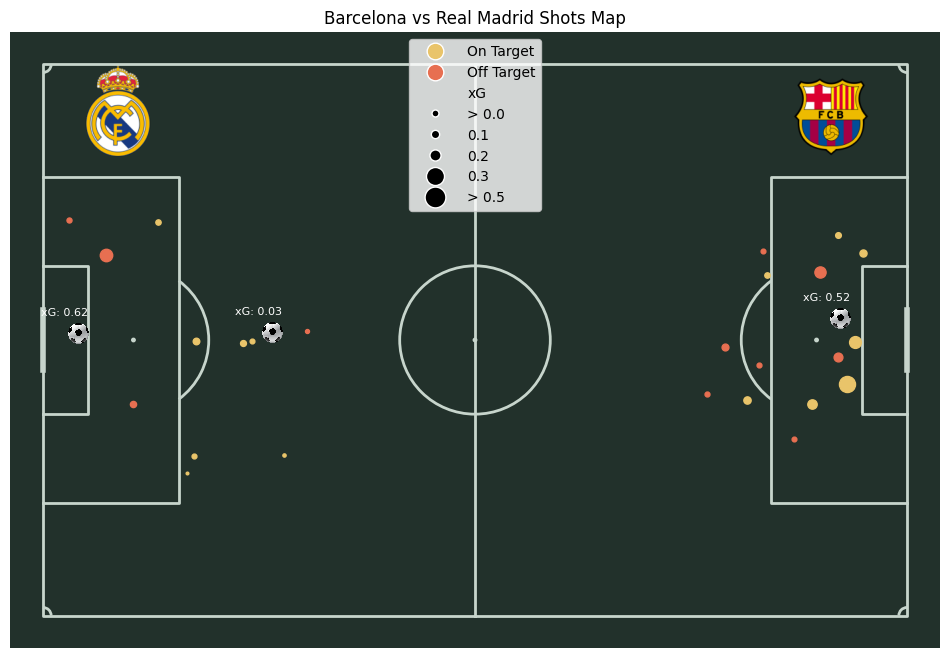

In [101]:
# Shot Maps
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from main_data import main_content
from mplsoccer.pitch import Pitch
from matplotlib.lines import Line2D


shots_data = main_content['shotmap']['shots']


first_team_shots = []
second_team_shots = []
path = './ball.png'
image = plt.imread(path)

for el in shots_data:
    if el['teamId'] != 8633:
        first_team_shots.append(
            {'x': el['x'], 'y': el['y'],
             'eventType': el['eventType'],
             'color': '#e9c46a' if el['isOnTarget'] else '#e76f51',
             'size': 100 if el['eventType'] == 'Goal' else 500 * el['expectedGoals'],
             'xG': el['expectedGoals'],
             'onTarget': el['isOnTarget']})
    else:
        second_team_shots.append(
            {'x': el['x'], 'y': el['y'],
             'eventType': el['eventType'],
             'color':  '#e9c46a' if el['isOnTarget'] else '#e76f51',
             'size': 100 if el['eventType'] == 'Goal' else 500 * el['expectedGoals'],
             'xG': el['expectedGoals'],
             'onTarget': el['isOnTarget'],
             })

pitch = Pitch(pitch_type='uefa',
              pitch_color='#22312b', line_color='#c7d5cc', corner_arcs=True)
fig, ax = pitch.draw(
    figsize=(12, 8), constrained_layout=True, tight_layout=False)

img = plt.imread('./logo.png')


for el in second_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.03), (2 * 52.5 - el['x'], 2 * 34 - el['y']), frameon=False)
        plt.gca().add_artist(ab)
        ax.annotate(f"xG: {el['xG']:.2f}", (2 * 52.5 - el['x'], 2 * 34 - el['y']), textcoords="offset points",
                    xytext=(-10, 15), ha='center', va='center', fontsize=8, color='white')
    plt.scatter(2 * 52.5 - el['x'], 2 * 34 - el['y'],
                color=el['color'], linewidths=1, s=el['size'], label='On Target' if el['onTarget'] else 'Off Target')


for el in first_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.03), (el['x'], el['y']), frameon=False)
        ax.annotate(f"xG: {el['xG']:.2f}", (el['x'], el['y']), textcoords="offset points",
                    xytext=(-10, 15), ha='center', va='center', fontsize=8, color='white')
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'], s=el['size'],
                linewidths=1, label='On Target' if el['onTarget'] else 'Off Target')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#e9c46a',
           markersize=12, label='On Target', linestyle='',),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#e76f51',
           markersize=12, label='Off Target', linestyle=''),
    Line2D([0], [0], marker='', color='w', label='xG', linestyle=''),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
           markersize=5, label='> 0.0', linestyle=''),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
           markersize=6, label='0.1', linestyle=''),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
           markersize=8, label='0.2', linestyle=''),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
           markersize=13, label='0.3', linestyle=''),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
           markersize=15, label='> 0.5', linestyle=''),

]


legend = ax.legend(handles=legend_elements,
                   loc='upper center', ncol=1, handlelength=3)


ax.imshow(img, extent=[ax.get_xlim()[0], ax.get_xlim()[
    1], ax.get_ylim()[0], ax.get_ylim()[1]], aspect='auto')

plt.title('Barcelona vs Real Madrid Shots Map')